### Set-up

In [1]:
# Imports
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Define global variables
num_features = 53
target_variable = 'POILBRE'
lag_steps = 1

In [3]:
df = read_csv('data/dataset.csv', header = 0, index_col = 0, usecols = [i for i in range(0, num_features+1)])
df.dropna(inplace=True) # NA values after June 2017
print(df.shape)
df.head()

(294, 53)


,PALUM,PBANSOP,PBARL,PBEEF,PCOALAU,PCOCO,PCOFFOTM,PCOFFROB,PROIL,PCOPP,...,PSUGAISA,PSUGAUSA,PSUNO,PTEA,PTIN,PURAN,PWHEAMT,PWOOLC,PWOOLF,PZINC
Commodity,,,,,,,,,,,,,,,,,,,,,
1993M1,1208.10,524.92,75.08,106.80,35.0,1035.57,68.66,48.13,425.93,2264.21,...,8.24,20.76,582.52,239.49,5913.10,9.80,155.65,312.39,495.22,1067.57
1993M2,1203.15,585.61,74.83,108.32,31.0,990.99,67.46,48.25,419.78,2212.18,...,8.56,21.05,570.79,203.56,5792.75,10.10,148.88,309.68,469.37,1073.63
1993M3,1150.48,659.00,75.16,114.59,31.0,977.32,62.77,46.86,435.22,2152.38,...,10.62,21.57,574.59,190.48,5666.30,10.20,147.90,309.67,469.37,996.76
1993M4,1110.28,563.70,77.45,117.57,31.0,1010.75,56.88,45.51,454.70,1953.62,...,11.15,21.69,607.14,177.75,5596.50,10.35,141.99,328.92,429.69,1006.00
1993M5,1125.42,461.60,77.46,121.39,31.0,998.07,61.48,46.91,436.65,1799.35,...,11.83,21.36,640.15,172.86,5505.47,10.10,136.58,337.01,468.13,979.26


In [4]:
df_transformed = read_csv('data/dataset_transformed.csv', index_col = 0)
print(df_transformed.shape)
df_transformed.head()

(293, 54)


,PALUM(t-1),PBANSOP(t-1),PBARL(t-1),PBEEF(t-1),PCOALAU(t-1),PCOCO(t-1),PCOFFOTM(t-1),PCOFFROB(t-1),PROIL(t-1),PCOPP(t-1),...,PSUGAUSA(t-1),PSUNO(t-1),PTEA(t-1),PTIN(t-1),PURAN(t-1),PWHEAMT(t-1),PWOOLC(t-1),PWOOLF(t-1),PZINC(t-1),POILBRE(t)
Commodity,,,,,,,,,,,,,,,,,,,,,
1993M2,1208.10,524.92,75.08,106.80,35.0,1035.57,68.66,48.13,425.93,2264.21,...,20.76,582.52,239.49,5913.10,9.80,155.65,312.39,495.22,1067.57,18.48
1993M3,1203.15,585.61,74.83,108.32,31.0,990.99,67.46,48.25,419.78,2212.18,...,21.05,570.79,203.56,5792.75,10.10,148.88,309.68,469.37,1073.63,18.75
1993M4,1150.48,659.00,75.16,114.59,31.0,977.32,62.77,46.86,435.22,2152.38,...,21.57,574.59,190.48,5666.30,10.20,147.90,309.67,469.37,996.76,18.63
1993M5,1110.28,563.70,77.45,117.57,31.0,1010.75,56.88,45.51,454.70,1953.62,...,21.69,607.14,177.75,5596.50,10.35,141.99,328.92,429.69,1006.00,18.51
1993M6,1125.42,461.60,77.46,121.39,31.0,998.07,61.48,46.91,436.65,1799.35,...,21.36,640.15,172.86,5505.47,10.10,136.58,337.01,468.13,979.26,17.59


In [5]:
# Train-Test Split
split = int(df_transformed.shape[0]*0.8)
train = df_transformed[:split]
test = df_transformed[split:]

# Separate into features and target (last column)
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

### Linear Regression

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

Linear Regression Test MAE: 13.473


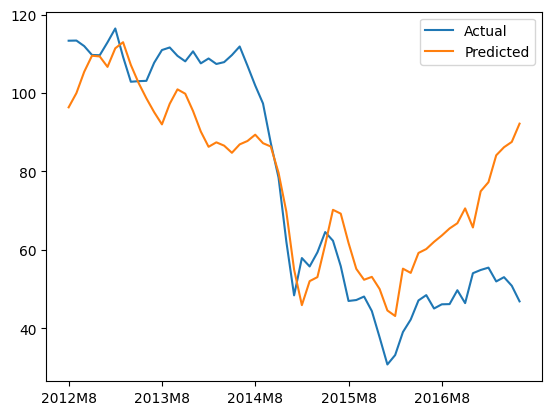

In [7]:
print('Linear Regression Test MAE: %.3f' % mae)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.xticks(np.arange(0, 60, 12))  # Set ticks every 12 months
plt.legend()
plt.show()

### Random Forest

In [8]:
rf_model = RandomForestRegressor(n_estimators=175, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

Random Forest Test MAE: 11.440


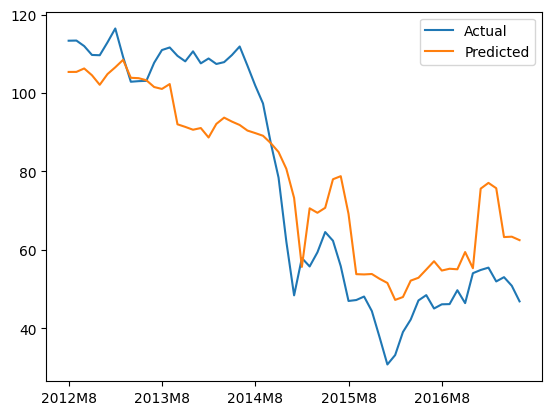

In [9]:
print('Random Forest Test MAE: %.3f' % mae)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.xticks(np.arange(0, 60, 12))  # Set ticks every 12 months
plt.legend()
plt.show()

### ARIMA

In [10]:
from pandas import to_datetime

# Convert y_train index to datetime
y_train_idx = y_train.index

# Convert 'YYYYM' format to 'YYYY-MM' by replacing 'M' with '-'
datetime_strings = [item.replace('M', '-') for item in y_train_idx]
datetime_objects = to_datetime(datetime_strings, format="%Y-%m")

y_train.index = datetime_objects

In [11]:
# Convert y_test index to datetime
y_test_idx = y_test.index

# Convert 'YYYYM' format to 'YYYY-MM' by replacing 'M' with '-'
datetime_strings = [item.replace('M', '-') for item in y_test_idx]
datetime_objects = to_datetime(datetime_strings, format="%Y-%m")

y_test.index = datetime_objects

In [12]:
arima_model = ARIMA(y_train, order=(3,0,0), freq='MS')
arima_model_fit = arima_model.fit()
y_pred = arima_model_fit.forecast(len(y_test))
mae = mean_absolute_error(y_test, y_pred)

/Users/xaviersan/.pyenv/versions/brent/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA Test MAE: 17.985


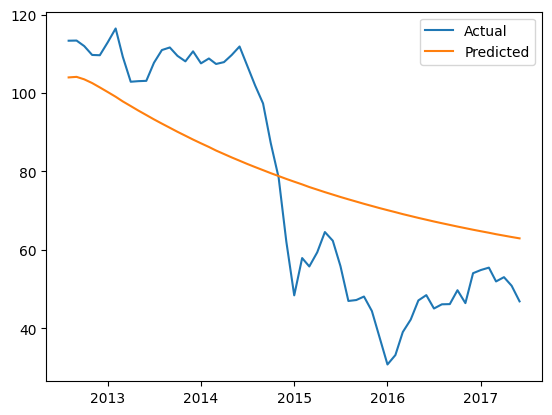

In [13]:
print('ARIMA Test MAE: %.3f' % mae)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.show()

### SARIMA

In [14]:
sarima_model = SARIMAX(y_train, 
                order=(3, 0, 2),
                seasonal_order=(0, 1, 2, 12),  # seasonal AR, seasonal differencing, seasonal MA, period
                enforce_stationarity=False,    # Allow non-stationarity
                enforce_invertibility=False)   # Allow non-invertibility
sarima_model_fit = sarima_model.fit()
y_pred = sarima_model_fit.forecast(len(y_test))
mae = mean_absolute_error(y_test, y_pred)


/Users/xaviersan/.pyenv/versions/brent/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/xaviersan/.pyenv/versions/brent/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82296D+00    |proj g|=  4.60239D-01


 This problem is unconstrained.



At iterate    5    f=  2.53677D+00    |proj g|=  1.45040D-01

At iterate   10    f=  2.52833D+00    |proj g|=  3.69881D-02

At iterate   15    f=  2.51001D+00    |proj g|=  2.07178D-01

At iterate   20    f=  2.50728D+00    |proj g|=  1.66688D-02

At iterate   25    f=  2.50703D+00    |proj g|=  4.76899D-03

At iterate   30    f=  2.50696D+00    |proj g|=  3.16033D-02

At iterate   35    f=  2.50691D+00    |proj g|=  8.45205D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     44      1     0     0   3.542D-05   2.507D+00
  F =   2.5069110986217908     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

SARIMA Test MAE: 21.087


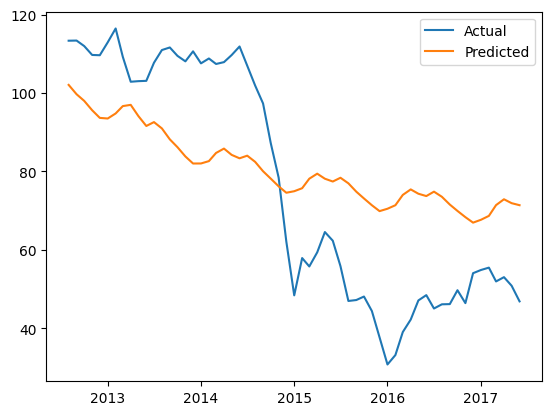

In [15]:
print('SARIMA Test MAE: %.3f' % mae)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.show()

### SARIMAX

In [16]:
# Convert X_train index to datetime
X_train_idx = X_train.index

# Convert 'YYYYM' format to 'YYYY-MM' by replacing 'M' with '-'
datetime_strings = [item.replace('M', '-') for item in X_train_idx]
datetime_objects = to_datetime(datetime_strings, format="%Y-%m")

X_train.index = datetime_objects

In [17]:
# Convert X_test index to datetime
X_test_idx = X_test.index

# Convert 'YYYYM' format to 'YYYY-MM' by replacing 'M' with '-'
datetime_strings = [item.replace('M', '-') for item in X_test_idx]
datetime_objects = to_datetime(datetime_strings, format="%Y-%m")

X_test.index = datetime_objects

In [18]:
sarimax_model = SARIMAX(y_train, 
                order=(3, 0, 0),
                seasonal_order=(0, 1, 2, 12),  # seasonal AR, seasonal differencing, seasonal MA, period
                enforce_stationarity=False,    # Allow non-stationarity
                enforce_invertibility=False,   # Allow non-invertibility
                exog=X_train)
sarimax_model_fit = sarimax_model.fit(maxiter=75)
y_pred = sarimax_model_fit.forecast(len(y_test), exog=X_test)
mae = mean_absolute_error(y_test, y_pred)

/Users/xaviersan/.pyenv/versions/brent/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/xaviersan/.pyenv/versions/brent/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           59     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29595D+00    |proj g|=  2.68716D+02


 This problem is unconstrained.



At iterate    5    f=  2.28656D+00    |proj g|=  1.38683D+01

At iterate   10    f=  2.27134D+00    |proj g|=  4.54692D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/xaviersan/.pyenv/versions/brent/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   59     13     55      2     0     0   1.101D+01   2.268D+00
  F =   2.2678025346901589     

ABNORMAL_TERMINATION_IN_LNSRCH                              


SARIMAX Test MAE: 12.083


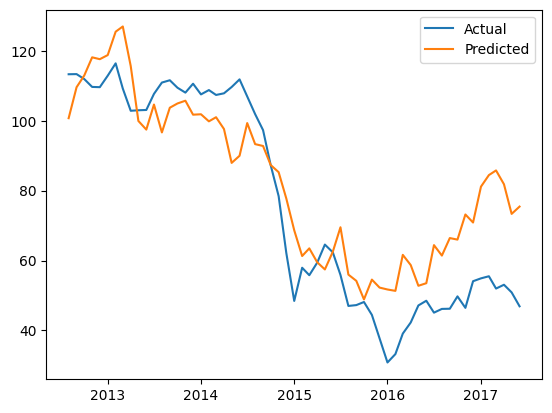

In [19]:
print('SARIMAX Test MAE: %.3f' % mae)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.show()

### Summary

We observe that the MAEs of the ML models in this notebook (~11-13) are much higher than the LSTM model's MAE of ~ 3. This showcases the LSTM model's proficiency in handling long-term dependencies and non-linear relationships.

The next steps could be to do the following:
1. Experiment with more advanced LSTM Architecture (e.g. LSTM with attention mechanism)
2. Combine LSTM with other models to capture both short-term linear trends and non-linear long-term dependencies effectively (e.g. Model short-term patterns with other ML model, then pass the residuals to the LSTM model to learn the non-linear long-term dependencies)
3. Explore relationships between POILBRE and other variables, reduce dimensions or feature engineer to improve accuracy